# Задача о рюкзаке. Вычисление максимальной суммы значений предметов (Knapsack).

**Идея:** Найти максимальную сумму значений предметов, при условии, что суммарный размер предметов не превосходит заданного C.

**Задача:** Составить программу, вычисляющую максимальную сумму значений предметов (Knapsack).

**Структура файла:**

- [размер_рюкзака] [количество_предметов]
- [значение_1] [вес_1]
- [значение_2] [вес_2]
- ...

Можно считать, что все числа положительные. Вы должны исходить из того, что вес предмета и вместимость рюкзака являются целыми числами.

## Алгоритм полного перебора в задаче о рюкзаке (knapsack).

**Ассимптотическая сложность алгоритма.**

$$ O(2^n) $$
где n - кол-во элементов, так как мы перебираем все возможные подмножества из n предметов.

In [1]:
from itertools import combinations

def knapsack_bruteforce(capacity, items):
    n = len(items)
    max_profit = 0

    for r in range(1, n + 1):
        for combination in combinations(items, r):
            total_weight = sum(item[1] for item in combination)
            total_value = sum(item[0] for item in combination)

            if total_weight <= capacity:
                max_profit = max(max_profit, total_value)

    return max_profit

## Решение задачи knapsack с помощью динамического программирования. 

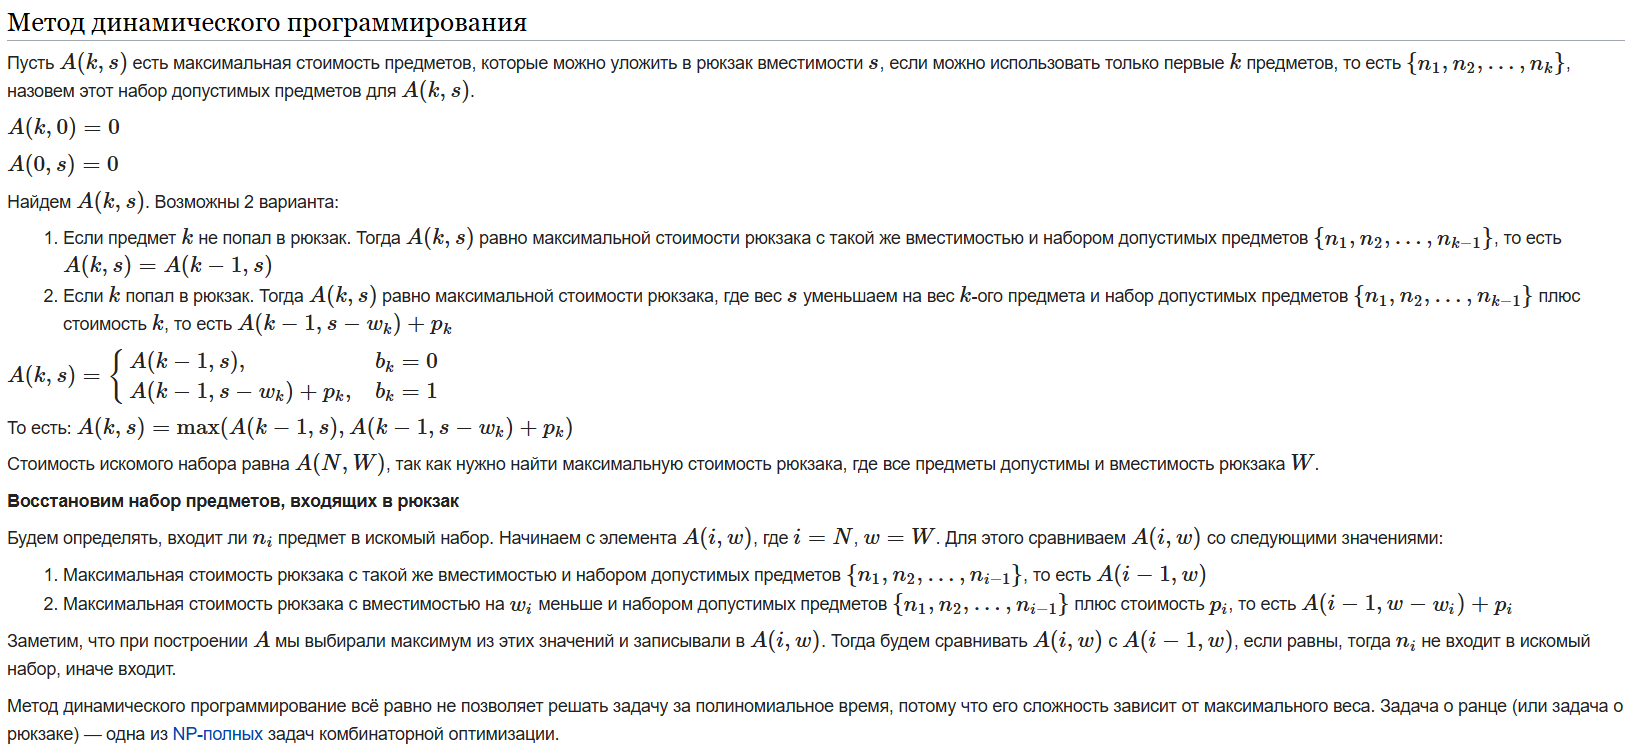

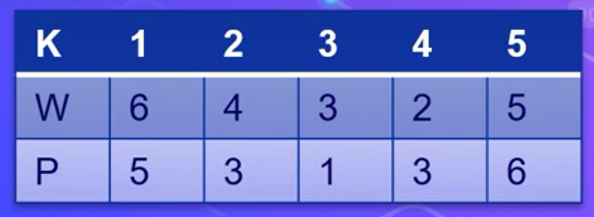

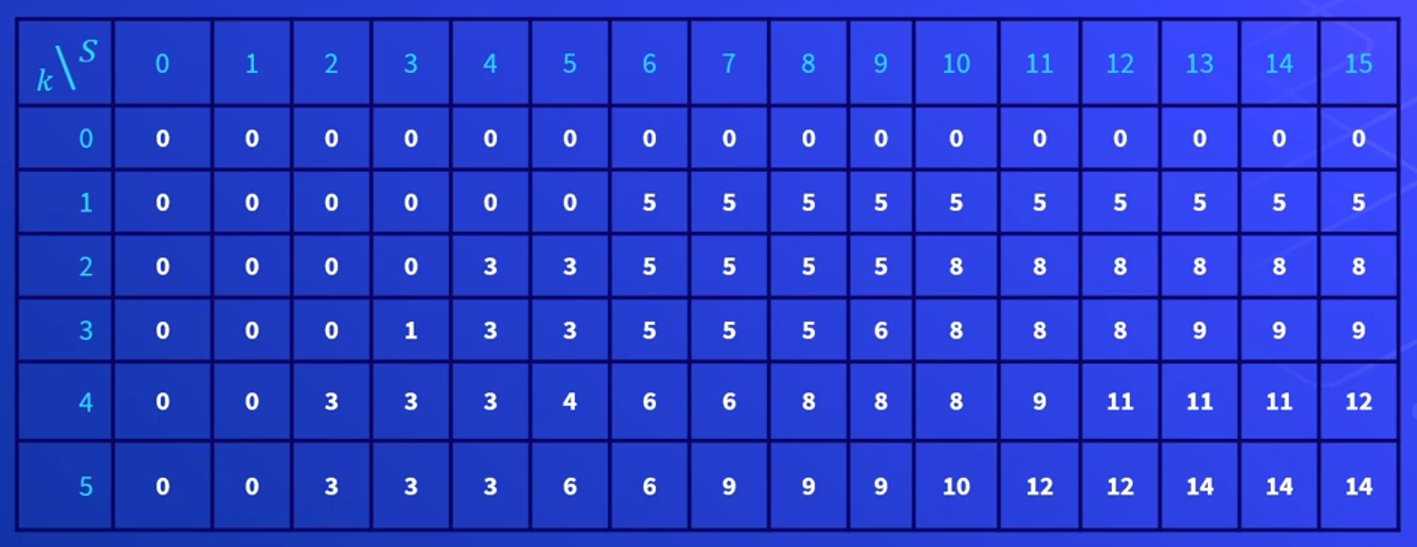

In [2]:
with open('items.txt', 'r') as f:
    C, N = map(int, f.readline().split())
    data = []
    for _ in range(N):
        value, weight = map(int, f.readline().split())
        data.append((value, weight))

print(f'Размер рюкзака на усложненной выборке: {C}\nКол-во предметов на усложненной выборке: {N}\n{data}')

Размер рюкзака на усложненной выборке: 2000000
Кол-во предметов на усложненной выборке: 2000
[(16808, 241486), (50074, 834558), (8931, 738037), (27545, 212860), (77924, 494349), (64441, 815107), (84493, 723724), (7988, 421316), (82328, 652893), (78841, 402599), (44304, 631607), (17710, 318556), (29561, 608119), (93100, 429390), (51817, 431959), (99098, 365899), (13513, 90282), (23811, 467558), (80980, 743542), (36580, 896948), (11968, 883369), (1394, 604449), (25486, 562244), (25229, 333236), (40195, 157443), (35002, 696933), (16709, 539123), (15669, 202584), (88125, 759690), (9531, 69730), (27723, 110467), (28550, 651058), (97802, 231944), (40978, 186803), (8229, 572887), (60299, 797491), (28636, 692529), (23866, 503157), (39064, 243688), (39426, 182032), (24116, 262772), (75630, 246257), (46518, 605917), (30106, 685556), (19452, 522241), (82189, 419114), (99506, 622799), (6753, 512332), (36717, 489578), (54439, 869423), (51502, 771067), (83872, 884103), (11138, 450309), (53178, 44480

In [11]:
import time

def knapsack_pack(C, items):

    n = len(items)
    
    pack = [[0] * (C + 1) for _ in range(n + 1)] # Создаем pack таблицу размерами (n + 1) x (С + 1)

    for i in range(1, n + 1):

        value, weight = items[i - 1]
        
        for w in range(C + 1):
            if weight > w:
                pack[i][w] = pack[i - 1][w]
            else:
                pack[i][w] = max(pack[i - 1][w], pack[i - 1][w - weight] + value)
    
    return pack[n][C]

In [12]:
start_time = time.time()
max_value = knapsack_pack(C, data)
end_time = time.time()

print(f'Время выполнения: {end_time - start_time}')
print(f'Максимальная сумма значений предметов: {max_value}')

Время выполнения: 1242.1663539409637
Максимальная сумма значений предметов: 4243395


## Рекурсивный knapsack. Использование мемоизации.

**Мемоизация** — это техника оптимизации, которая заключается в сохранении результатов уже выполненных вычислений для того, чтобы при повторном запросе не пересчитывать их, а просто использовать ранее сохранённый результат.

Как работает мемоизация?
1. Рекурсивный вызов: Когда функция вызывается для решения подзадачи, она проверяет, была ли уже вычислена эта подзадача ранее.
2. Проверка в кэше: Если результат подзадачи уже находится в кэше (обычно это словарь или массив), функция сразу возвращает сохранённый результат.
3. Сохранение новых результатов: Если подзадача ещё не решена, функция вычисляет результат и сохраняет его в кэше перед тем, как вернуть его. Так, если тот же запрос поступит в будущем, результат будет браться из кэша.

Рекурсивный подход с мемоизацией может выполняться быстрее, чем стандартный алгоритм с двумерным массивом, так как:

1. *Избегает избыточных вычислений*

В классическом подходе мы создаём двумерную таблицу большого размера и заполняем каждую ячейку независимо от того, потребуется ли она в результате. Это означает, что мы вычисляем значение для всех возможных комбинаций предметов и ёмкостей, даже если не все из них будут использоваться в оптимальном решении. Рекурсивный подход с мемоизацией вычисляет только те подзадачи, которые действительно необходимы для конкретного набора предметов и заданной ёмкости.

2. *Гибкость мемоизации*

В табличном методе все возможные комбинации заполняются заранее, тогда как в рекурсивном методе с мемоизацией подзадачи рассчитываются и сохраняются только по мере необходимости.



In [5]:
def knapsack_recursive(capacity, items, index, memo):

    if index == 0 or capacity == 0:
        return 0

    if (index, capacity) in memo:
        return memo[(index, capacity)]

    value, weight = items[index - 1]

    if weight > capacity:
        memo[(index, capacity)] = knapsack_recursive(capacity, items, index - 1, memo)
    else:
        memo[(index, capacity)] = max(knapsack_recursive(capacity, items, index - 1, memo),  # не берем предмет
            value + knapsack_recursive(capacity - weight, items, index - 1, memo)  # берем предмет
        )

    return memo[(index, capacity)]

def knapsack(capacity, items):
    memo = {}
    return knapsack_recursive(capacity, items, len(items), memo)

In [6]:
start_time = time.time()
max_value = knapsack(C, data)
end_time = time.time()

print(f'Время выполнения: {end_time - start_time}')
print(f'Максимальная сумма значений предметов: {max_value}')

Время выполнения: 15.918360710144043
Максимальная сумма значений предметов: 4243395


## Метод ветвления и отсечения для задачи о рюкзаке с использованием дерева решений.

Метод ветвления и отсечения (Branch and Bound) представляет собой подход, при котором создаётся дерево решений. Каждый узел дерева отражает выбор включить или не включить текущий предмет в рюкзак.

- Построение дерева: Начинаем с корня дерева, где рюкзак пустой. Далее на каждом уровне мы рассматриваем один предмет — добавляем его или пропускаем. Каждый уровень представляет решение с ещё одним предметом.
- Отсечение: При вычислении ценности на каждом узле можно использовать верхнюю оценку (например, максимальную ценность, которую можно достичь с оставшимися предметами) и отсекать те ветви, которые не смогут дать лучшее решение, чем текущее оптимальное. Это позволяет существенно сократить количество рассматриваемых вариантов.

*Использование дерева решений с отсечением позволяет избежать ненужных вычислений, так как ветви, которые не могут улучшить текущий максимум, отбрасываются. Куча помогает обрабатывать самые перспективные узлы в первую очередь, что ускоряет нахождение оптимального решения.*

Будем использовать **очередь с приоритетом** для того, чтобы всегда сначала обрабатывать узлы с наивысшим потенциальным значением.

**Ассимптотическая сложность алгоритма.**

В худшем случае алгоритм может создать и обработать почти все возможные комбинации предметов, что приведёт к экспоненциальной сложности (если на каждом уровне не удаётся отсеивать узлы, и алгоритм вынужден рассматривать все подмножества предметов):
$$ O(2^n), $$
где n — количество предметов.

Алгоритм ветвей и границ выигрывает за счёт отсечения (отказа от неперспективных узлов) и очереди с приоритетом, которая обрабатывает узлы с наиболее высокими верхними оценками. Это позволяет в среднем обрабатывать только часть пространства состояний, что значительно снижает время выполнения по сравнению с полным перебором.

Средняя сложность становится ближе к:

$$ O(k*logk), $$
где k — количество узлов, которые реально добавляются и извлекаются из очереди. Значение k в среднем может быть намного меньше 
$ 2^n $, особенно если предметы имеют высокое соотношение ценности к весу, что позволяет быстрее находить оптимальные решения и эффективно отсекать остальные варианты.

In [7]:
import heapq

'''
Node представляет узел дерева решений.
Каждый узел указывает, включён ли текущий предмет (на уровне level) в рюкзак или нет.

self.level = level        # Уровень (индекс) текущего предмета
self.profit = profit      # Текущая ценность (сумма значений предметов)
self.weight = weight      # Текущий вес рюкзака
self.bound = bound        # Верхняя оценка возможной максимальной ценности

__lt__ — определяет порядок узлов в очереди с приоритетом.
Мы используем максимальную bound для приоритетной обработки узлов (max-куча).
'''

class Node:
    def __init__(self, level, profit, weight, bound):
        self.level = level
        self.profit = profit
        self.weight = weight
        self.bound = bound

    def __lt__(self, other):
        return self.bound > other.bound

In [8]:
'''
bound оценивает максимальную возможную ценность рюкзака из текущего состояния узла node.

В цикле while добавляем предметы, пока их общий вес не превышает вместимость рюкзака.

Если ещё есть место, добавляем долю следующего предмета. Она используется исключительно для оценки потенциала узла,
доля служит способом приближения потенциально достижимой максимальной ценности.
'''

def bound(node, n, capacity, items):

    if node.weight >= capacity:
        return 0

    profit_bound = node.profit
    j = node.level + 1
    total_weight = node.weight

    while j < n and total_weight + items[j][1] <= capacity:
        total_weight += items[j][1]
        profit_bound += items[j][0]
        j += 1

    if j < n:
        profit_bound += (capacity - total_weight) * items[j][0] / items[j][1]

    #print(node.level, node.profit, node.weight, profit_bound)

    return profit_bound

In [9]:
'''
Задача о рюкзаке с использованием метода ветвей и границ (branch and bound),
на основе очереди с приоритетами для отсечения невыгодных путей.

1. Мы сортируем items по убыванию отношения ценность/вес (чтобы быстрее достигать наибольшей ценности).
2. Создаем начальный узел и добавляем его в очередь.
3. Извлекается узел с наибольшей верхней границей, чтобы рассмотреть узлы,
которые потенциально могут привести к более высокому profit.
4. Создаем дочерний узел (следующий уровень и добавляем профит, вес).
5. Проверяем и обновляем максимальной ценность.
6. Если верхняя граница больше текущего max_profit, узел добавляется в очередь для дальнейшего рассмотрения.
7. Если предмет не включается, то создаётся альтернативный узел, где  profit и weight остаются такими же, как у узла u.
Если верхняя граница v.bound этого узла выше текущего max_profit, узел добавляется в очередь.
'''

def knapsack_branch_and_bound(capacity, items):

    n = len(items)
    items = sorted(items, key=lambda x: x[0] / x[1], reverse=True)

    queue = []
    u = Node(-1, 0, 0, 0)
    u.bound = bound(u, n, capacity, items)
    heapq.heappush(queue, u)

    max_profit = 0

    while queue:
        u = heapq.heappop(queue)

        if u.level == n - 1 or u.bound <= max_profit:
            continue

        v = Node(u.level + 1,
                u.profit + items[u.level + 1][0],
                u.weight + items[u.level + 1][1],
                0)
        
        if v.weight <= capacity and v.profit > max_profit:
            max_profit = v.profit

        v.bound = bound(v, n, capacity, items)
        if v.bound > max_profit:
            heapq.heappush(queue, v)

        v = Node(u.level + 1, u.profit, u.weight, 0)
        v.bound = bound(v, n, capacity, items)
        if v.bound > max_profit:
            heapq.heappush(queue, v)

    return max_profit

In [10]:
start_time = time.time()
max_value = knapsack_branch_and_bound(C, data)
end_time = time.time()

print(f'Время выполнения на данных: {end_time - start_time}')
print(f'Максимальная сумма значений предметов на данных: {max_value}')

Время выполнения на данных: 0.011014938354492188
Максимальная сумма значений предметов на данных: 4243395
